In [18]:
import json
import vk
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
group_id_list = ["11108956", "27914325", "1955", "6662867", ]  # ID всех групп
group_name_list = ["rapda Москва Участники", "beatonn Москва Участники",  
                   "rap4all Питер Участники", "club6662867 Питер Участники"] # Названия всех групп
token = ""  # Сервисный ключ доступа

session = vk.Session(access_token=token)  # Авторизация
vk_api = vk.API(session)

print(vk_api)

In [ ]:
def deep_get(dictionary, keys, default=None):
    return reduce(lambda d, key: d.get(key, default) if isinstance(d, dict) else default, keys.split("."), dictionary)

In [ ]:
# С записью в CSV
def get_posts(group_id):
    first = vk_api.wall.get(owner_id=group_id, filter="owner", v=5.124)
    data = first["items"]  # Присваиваем переменной первую тысячу id'шников
    count = first["count"] # Присваиваем переменной количество участников
    for i in range(1, count+1):  
        data += vk_api.wall.get(owner_id=group_id, v=5.124, filter="owner", count=1, offset=i*1)["items"]

    for i in data:
        id = i.get('id')
        likes = deep_get(i, 'likes.count')
        views = deep_get(i, 'views.count')
        comments = deep_get(i, 'comments.count')
        date = i.get('date')
        
        # Если дата меньше 20.10.2019
        if date < 1571529600:
            print('break')
            break

        timestamp = datetime.datetime.fromtimestamp(date)
        date = timestamp.strftime('%d-%m-%Y')
        f.writerow([id,
                date,
                likes,
                views,
                comments])

In [ ]:
# С записью в csv
def get_membersCSV(groupid, fields=('sex', 'bdate', 'city', 'country', 'domain')):
    first = vk_api.groups.getMembers(group_id=groupid, count=20, fields=fields, v=5.92)  # Первое выполнение метода
    data = first["items"]  # Присваиваем переменной первую тысячу id'шников
    count = first["count"] # Присваиваем переменной количество участников
    # С каждым проходом цикла смещение offset увеличивается на тысячу
    # и еще тысяча id'шников добавляется к нашему списку.
    for i in range(1, count+1):  
        data = data + vk_api.groups.getMembers(group_id=groupid, fields=fields, v=5.92, offset=i*1000)["items"]
    for i in data:
        id = i.get('id')
        name = i.get('first_name')
        surname = i.get('last_name')
        country = deep_get(i, 'country.title')
        city = deep_get(i, 'city.title')
        sex = i.get('sex')
        if sex == 1:
            sex = "F"
        else:
            sex = "M"
        birthday = deep_get(i, 'bdate')

        f.writerow([id,
                name,
                surname,
                sex,
                birthday,
                country,
                city])

In [ ]:
# Запись данных участников всех групп в csv файлы
for groupID, groupName in zip(group_id_list, group_name_list):
    f = csv.writer(open(groupName+".csv", "w", newline='', encoding="utf-8"))

    f.writerow(["ID", "Name", "Lastname", "Sex", "Birthday", "Country", "City"])
    
    get_membersCSV(groupID)

In [ ]:
# Запись данных постов всех групп в csv файлы
for groupID, groupName in zip(group_id_list, group_name_list):

    f = csv.writer(open(groupName + " Посты"+".csv", "w", newline='', encoding="utf-8"))

    f.writerow(["ID", "Date", "Likes", "Views", "Comments"])
    try:
        get_posts("-" + groupID)
    except Exception as e:
        print(e)
        pass

In [13]:
# Без записи в CSV
def get_members(groupid, fields=()):
    first = vk_api.groups.getMembers(group_id=groupid, fields=fields, v=5.92)  # Первое выполнение метода
    data = first["items"]  # Присваиваем переменной первую тысячу id'шников
    #count = first["count"]  # Присваиваем переменной количество тысяч участников
    count = 100
    # С каждым проходом цикла смещение offset увеличивается на тысячу
    # и еще тысяча id'шников добавляется к нашему списку.
    for i in range(1, count+1):  
        data = data + vk_api.groups.getMembers(group_id=groupid, fields=fields, v=5.92, offset=i*1000)["items"]
    return data

In [14]:
groups_with_members = {}

for name, id_ in zip(group_name_list, group_id_list):
    groups_with_members[name] = set(get_members(id_))
print(groups_with_members)

{'rapda Москва Участники': {13107211, 45088783, 33292311, 786460, 30408735, 17301545, 47, 48, 19923000, 50069564, 48496705, 5242951, 45875275, 42729548, 49807437, 5505102, 44564560, 18874449, 1835093, 37224539, 18612316, 3145825, 16253025, 35127395, 45351009, 24379493, 31719525, 9437289, 15204457, 6029419, 15728750, 27263086, 36438130, 10485876, 19136629, 14942326, 8126588, 31195261, 28573822, 24903810, 38535302, 18088076, 19136654, 32506000, 42205329, 27525268, 23330967, 30671001, 10223771, 33816733, 16253087, 25952416, 15204514, 15728802, 37748900, 12583080, 8650922, 29884587, 21758125, 28311729, 14155958, 34865336, 21233851, 7602365, 1835198, 26738887, 19923144, 27525323, 22806732, 2359502, 3408080, 12845265, 2359506, 8913107, 49545428, 11796696, 49545434, 29622494, 45351141, 20709606, 23331051, 29622508, 31719661, 29622519, 49545465, 25952508, 5243133, 19923198, 20447486, 48234753, 12321028, 15466756, 16515336, 51380489, 9699597, 11796752, 11272465, 16777490, 23593235, 30671123, 19

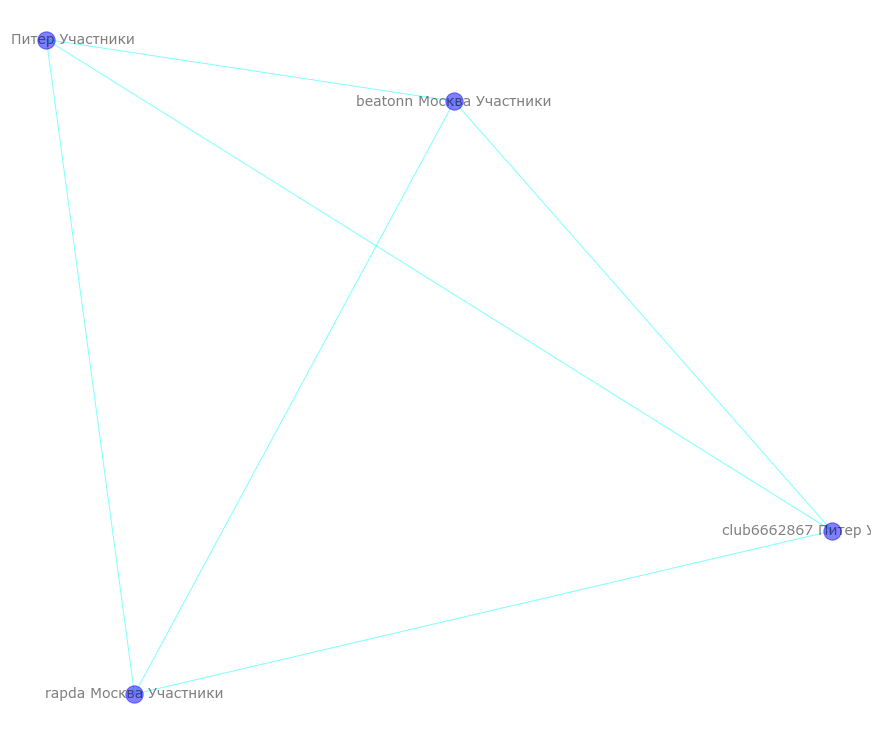

In [19]:
G_rock = nx.Graph()
G = nx.Graph()
for gr1 in groups_with_members:
    for gr2 in groups_with_members:
        if gr1 != gr2:
            intersection = len(groups_with_members[gr1].intersection(groups_with_members[gr2]))
            if intersection > 0:
                G_rock.add_edge(gr1, gr2, weight=intersection)
                
weights = [G[u][v]['weight']*0.1 for u,v in G.edges()]

plt.figure(figsize=(12,10))
nx.draw(G_rock, with_labels=True, alpha=0.5, font_family='verdana', node_color="Blue", edge_color='Cyan', font_size=14, width=weights)
plt.show()